<a href="https://colab.research.google.com/github/Aiman217/WMU102/blob/main/WMU102_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**This is the project for course WMU102**

In [123]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1-V6dmdaCZaaNdCJ734CAvuNtfqcGhjcg')

In [125]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [126]:
for col in df:
  temp = df[col].dtypes
  if temp == 'object':
    print(col)
    print(df[col].unique())
    print('\n')

gender
['Male' 'Female' 'Other']


ever_married
['Yes' 'No']


work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Residence_type
['Urban' 'Rural']


smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




In [149]:
df['ever_married'] = df['ever_married'].replace(['Yes'],'1')
df['ever_married'] = df['ever_married'].replace(['No'],'0')
df['ever_married'] = pd.to_numeric(df['ever_married'])

In [129]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [130]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110.000000,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,NaN,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,NaN,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,NaN,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,0.656164,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,0.475034,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,0.000000,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,0.000000,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,1.000000,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,1.000000,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [131]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [132]:
print(pd.isnull(df).sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [133]:
refine_df = df.dropna(how='any',axis=0)

In [134]:
refine_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,0,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [135]:
refine_df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909,4909.000000,4909.000000,4909.000000,4909.000000,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,NaN,3,NaN,NaN,NaN,NaN,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,NaN,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2897,NaN,NaN,NaN,NaN,2811,2490,NaN,NaN,1852,NaN
mean,37064.313506,NaN,42.865374,0.091872,0.049501,0.652679,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,20995.098457,NaN,22.555115,0.288875,0.216934,0.476167,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,77.000000,NaN,0.080000,0.000000,0.000000,0.000000,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,18605.000000,NaN,25.000000,0.000000,0.000000,0.000000,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,37608.000000,NaN,44.000000,0.000000,0.000000,1.000000,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,55220.000000,NaN,60.000000,0.000000,0.000000,1.000000,NaN,NaN,113.570000,33.100000,NaN,0.000000


In [136]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
ever_married_encoded=le.fit_transform(refine_df['ever_married'])
ever_married_encoded = np.array(ever_married_encoded)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

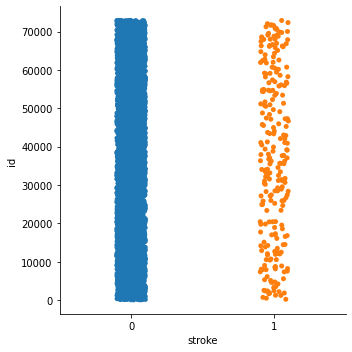

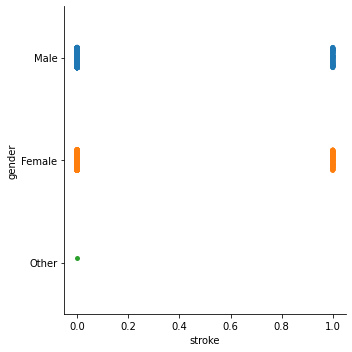

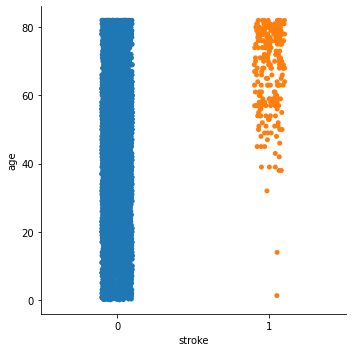

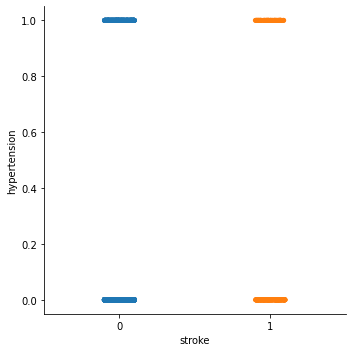

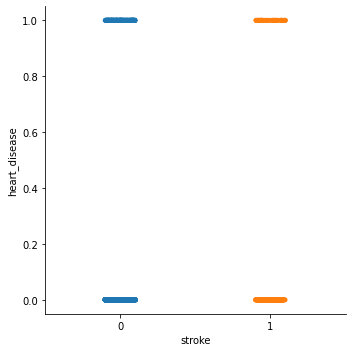

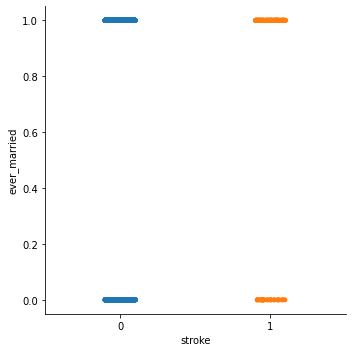

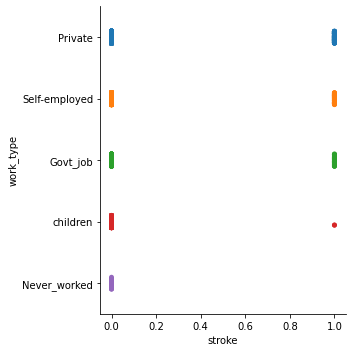

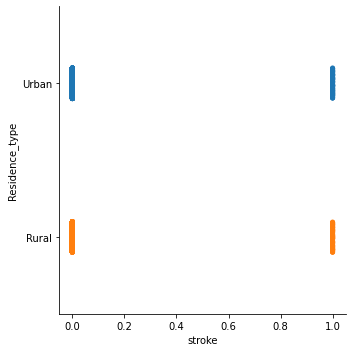

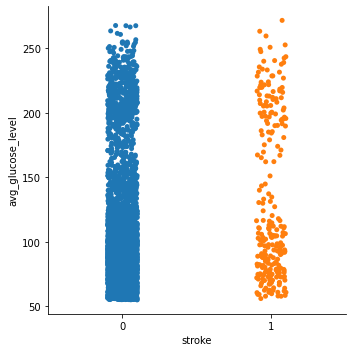

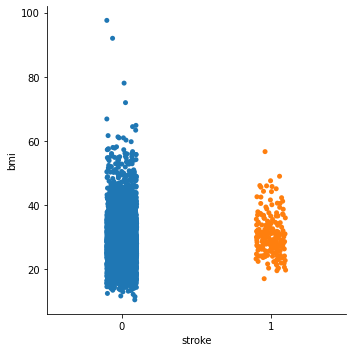

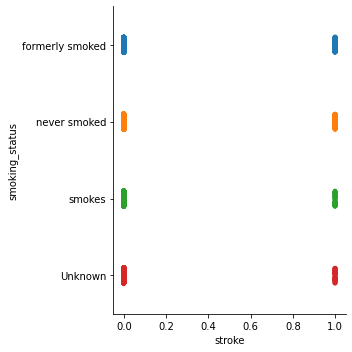

In [137]:
for col in df.columns:
  if col != "stroke":
      sns.catplot("stroke", col, data = df)

In [138]:
X = refine_df.drop('stroke',axis=1)

In [139]:
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,0,children,Rural,103.08,18.6,Unknown
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked


In [140]:
Y = refine_df['stroke']

In [141]:
Y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=122)

In [143]:
train_X.shape, test_X.shape

((3927, 11), (982, 11))

In [144]:
train_X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2282,55566,Female,34.0,0,0,1,Private,Rural,231.50,45.4,never smoked
2172,3842,Male,73.0,0,0,1,Private,Rural,86.57,28.5,formerly smoked
3997,18032,Male,62.0,0,1,1,Private,Rural,90.61,25.8,smokes
2414,69502,Female,52.0,1,0,1,Private,Urban,155.86,27.2,smokes
194,23410,Female,72.0,0,0,1,Private,Rural,97.92,26.9,smokes
...,...,...,...,...,...,...,...,...,...,...,...
745,44583,Female,56.0,0,1,1,Private,Rural,70.02,32.3,never smoked
1415,57124,Male,37.0,0,0,1,Private,Urban,120.07,33.9,smokes
2352,58599,Female,67.0,0,0,1,Private,Rural,62.66,28.0,formerly smoked
4200,13540,Female,59.0,0,0,1,Self-employed,Rural,115.68,27.1,Unknown


In [145]:
test_X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2874,68970,Female,24.0,0,0,0,Private,Urban,85.07,22.5,Unknown
3142,21917,Male,43.0,0,0,1,Govt_job,Rural,110.69,35.6,Unknown
2725,40390,Female,12.0,0,0,0,children,Rural,150.03,28.2,never smoked
3666,20098,Female,31.0,0,0,1,Self-employed,Rural,108.64,43.3,never smoked
3481,23851,Female,57.0,0,0,0,Private,Rural,87.18,20.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...,...
2329,59904,Female,1.8,0,0,0,children,Urban,162.93,15.7,Unknown
3089,69918,Female,38.0,1,0,1,Private,Rural,109.46,41.5,never smoked
4197,23238,Male,53.0,0,1,1,Private,Rural,95.23,35.2,smokes
3762,49900,Male,7.0,0,0,0,children,Urban,56.32,15.9,Unknown


In [146]:
train_Y.shape, test_Y.shape

((3927,), (982,))

In [147]:
train_Y

2282    0
2172    0
3997    0
2414    0
194     1
       ..
745     0
1415    0
2352    0
4200    0
2566    0
Name: stroke, Length: 3927, dtype: int64

In [148]:
test_Y

2874    0
3142    0
2725    0
3666    0
3481    0
       ..
2329    0
3089    0
4197    0
3762    0
2236    0
Name: stroke, Length: 982, dtype: int64